In [1]:
# randomness is fun, but I wanted to try something deliberate

In [1]:
import cairo
from IPython.display import Image, display, SVG
import seaborn as sns
from math import pi
import math
from io import BytesIO
import numpy as np

In [2]:
# I want to be able accept a center, heading, nsides, circle radius.

# Draws the circle and shape.
def draw_inscribed_circle(cr, center, heading, radius, nsides, circle, fill=True):
    cx, cy = center
    c = cmap[nsides-3]
    cr.set_source_rgba(*c)
    cr.move_to(*center)
    cr.stroke()
    if circle:
        if fill:
            cr.arc(*center, radius, 0, 2*pi)
            cr.fill_preserve()
            cr.set_source_rgba(1,1,1,c[3])
            cr.stroke()
            cr.set_source_rgba(*c)
        else:
            cr.arc(*center, radius, 0, 2*pi)
            cr.stroke()
    
    if fill:
        cr.set_source_rgba(1,1,1,c[3])
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()
        last_x, last_y = this_x, this_y

# Return sets of (center, heading). Indicates where the next circles should be drawn
def get_next_sets(cr, center, heading, radius, nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    for i in range(nsides):
        cr.move_to(*center)
        x = center[0] + np.cos(init_hd + i * incr) * 1.75*radius
        y = center[1] + np.sin(init_hd + i * incr)*1.75*radius
        sets.append([(x,y), init_hd + i * incr])
    
    return sets    
    
def recursive_shapes(cr, origin, heading, radius, nsides, circle=True):
    draw_inscribed_circle(cr, center=origin, heading=heading, radius=radius, nsides=nsides, circle=circle)
    if nsides >= 4:
        next_sides = nsides-1
        sets = get_next_sets(cr, center=origin, heading=heading, radius=radius, nsides=nsides)
        for s in sets:
            recursive_shapes(cr, origin=s[0], heading=s[1], radius=radius, nsides=next_sides, circle=circle)
            



In [3]:
WIDTH = 800
HEIGHT = 800
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.8 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'YlGnBu' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles



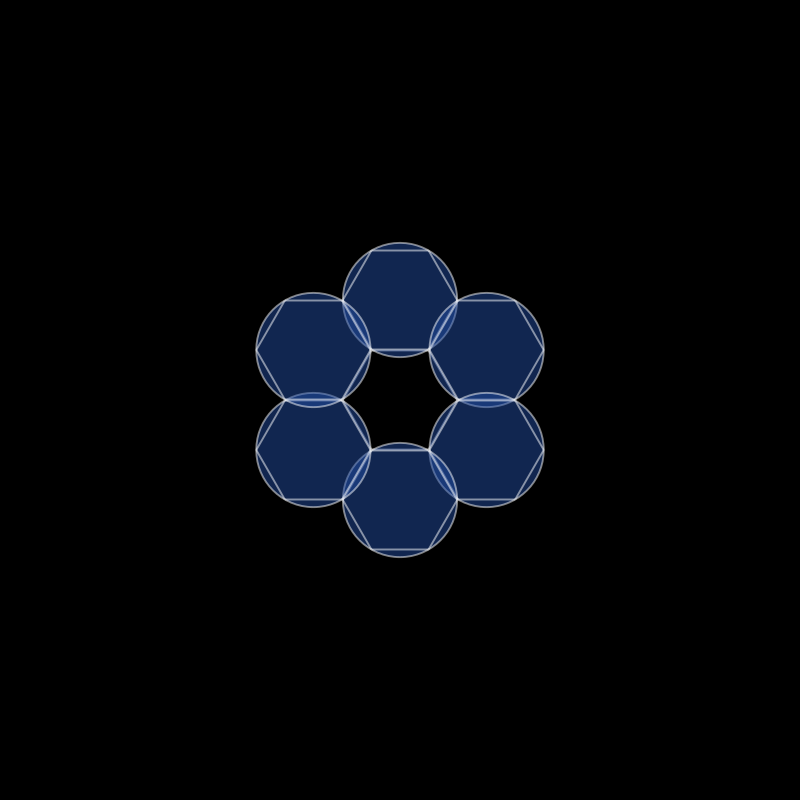

In [4]:
WIDTH = 800
HEIGHT = 800
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'YlGnBu' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides-2))}
radius = 1 / (((nsides-3)*2 + 1) * 2)
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0,0,0)
ctx.fill()

ctx.set_line_width(radius/30)
#recursive_shapes(ctx, origin=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, circle=draw_circles)
cmap = {i: [1,1,1, alpha] for i in range(nsides-2)}
draw_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, circle=False, fill=False)
sets = get_next_sets(ctx, (0.5,0.5), heading, radius, 6)
cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides-2))}
for s in sets:
    draw_inscribed_circle(ctx, s[0], s[1], radius, nsides, True, True)
io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))

In [5]:
cmap

{0: [0.84, 0.9372549019607843, 0.7011764705882353, 0.5],
 1: [0.44941176470588234, 0.7858823529411765, 0.7403921568627451, 0.5],
 2: [0.14196078431372547, 0.5976470588235294, 0.756078431372549, 0.5],
 3: [0.1380392156862745, 0.3027450980392157, 0.6274509803921569, 0.5]}

In [6]:
def draw_nested_inscribed_circle(cr, center, heading, radius, nsides, circle, fill=True):
    cx, cy = center
    
    c = cmap[0]
    white = [1,1,1, 1]
    #cr.set_source_rgba(*white)
    
    cr.move_to(*center)
    cr.stroke()
    if circle:
    #     if circle:
    #         if fill:
    #             cr.set_source_rgba(*c)
    #             cr.arc(*center, radius, 0, 2*pi)
    #             cr.fill_preserve()
    #             cr.set_source_rgba(*white)
    #             cr.stroke()

    #         else:
        cr.set_source_rgba(*white)
        cr.arc(*center, radius, 0, 2*pi)
        cr.stroke()
    
    #if fill:
    #    cr.set_source_rgba(1,1,1,c[3])
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.set_source_rgba(*white)
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()
        """
        if i != nsides:
            c = cmap[i]
            if fill:
                cr.set_source_rgba(*c)
                cr.arc(*[this_x, this_y], radius, 0, 2*pi)
                cr.fill_preserve()
                cr.set_source_rgba(1,1,1,c[3])
                cr.stroke()
            else:
                cr.arc(*[this_x, this_y], radius, 0, 2*pi)
                cr.stroke()
        """
        last_x, last_y = this_x, this_y
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2
        if i != nsides:
            c = cmap[i]
            if fill:
                cr.set_source_rgba(*c)
                cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
                cr.fill_preserve()
                cr.set_source_rgba(1,1,1,c[3])
                cr.stroke()
            else:
                cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
                cr.stroke()
        
        last_x, last_y = this_x, this_y

In [7]:
def draw_nested_inscribed_circle(cr, center, heading, radius, nsides, line_color, circle):
    cx, cy = center
    cr.move_to(*center)
    cr.stroke()
    white = line_color
    
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
    #circle fills
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2
        if i != nsides:
            c = cmap[i]
            
            cr.set_source_rgba(*c)
            cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
            cr.fill_preserve()
            cr.set_source_rgba(*white)
            cr.stroke()
        last_x, last_y = this_x, this_y
    #circle outlines
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2            
        cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
        cr.set_source_rgba(*white)
        cr.stroke()


        last_x, last_y = this_x, this_y
    
    c = cmap[0]
    
    #cr.set_source_rgba(*white)
    
    cr.move_to(*center)
    cr.stroke()
    if circle:
        cr.set_source_rgba(*white)
        cr.arc(*center, radius, 0, 2*pi)
        cr.stroke()
    

    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.set_source_rgba(*white)
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()

        last_x, last_y = this_x, this_y


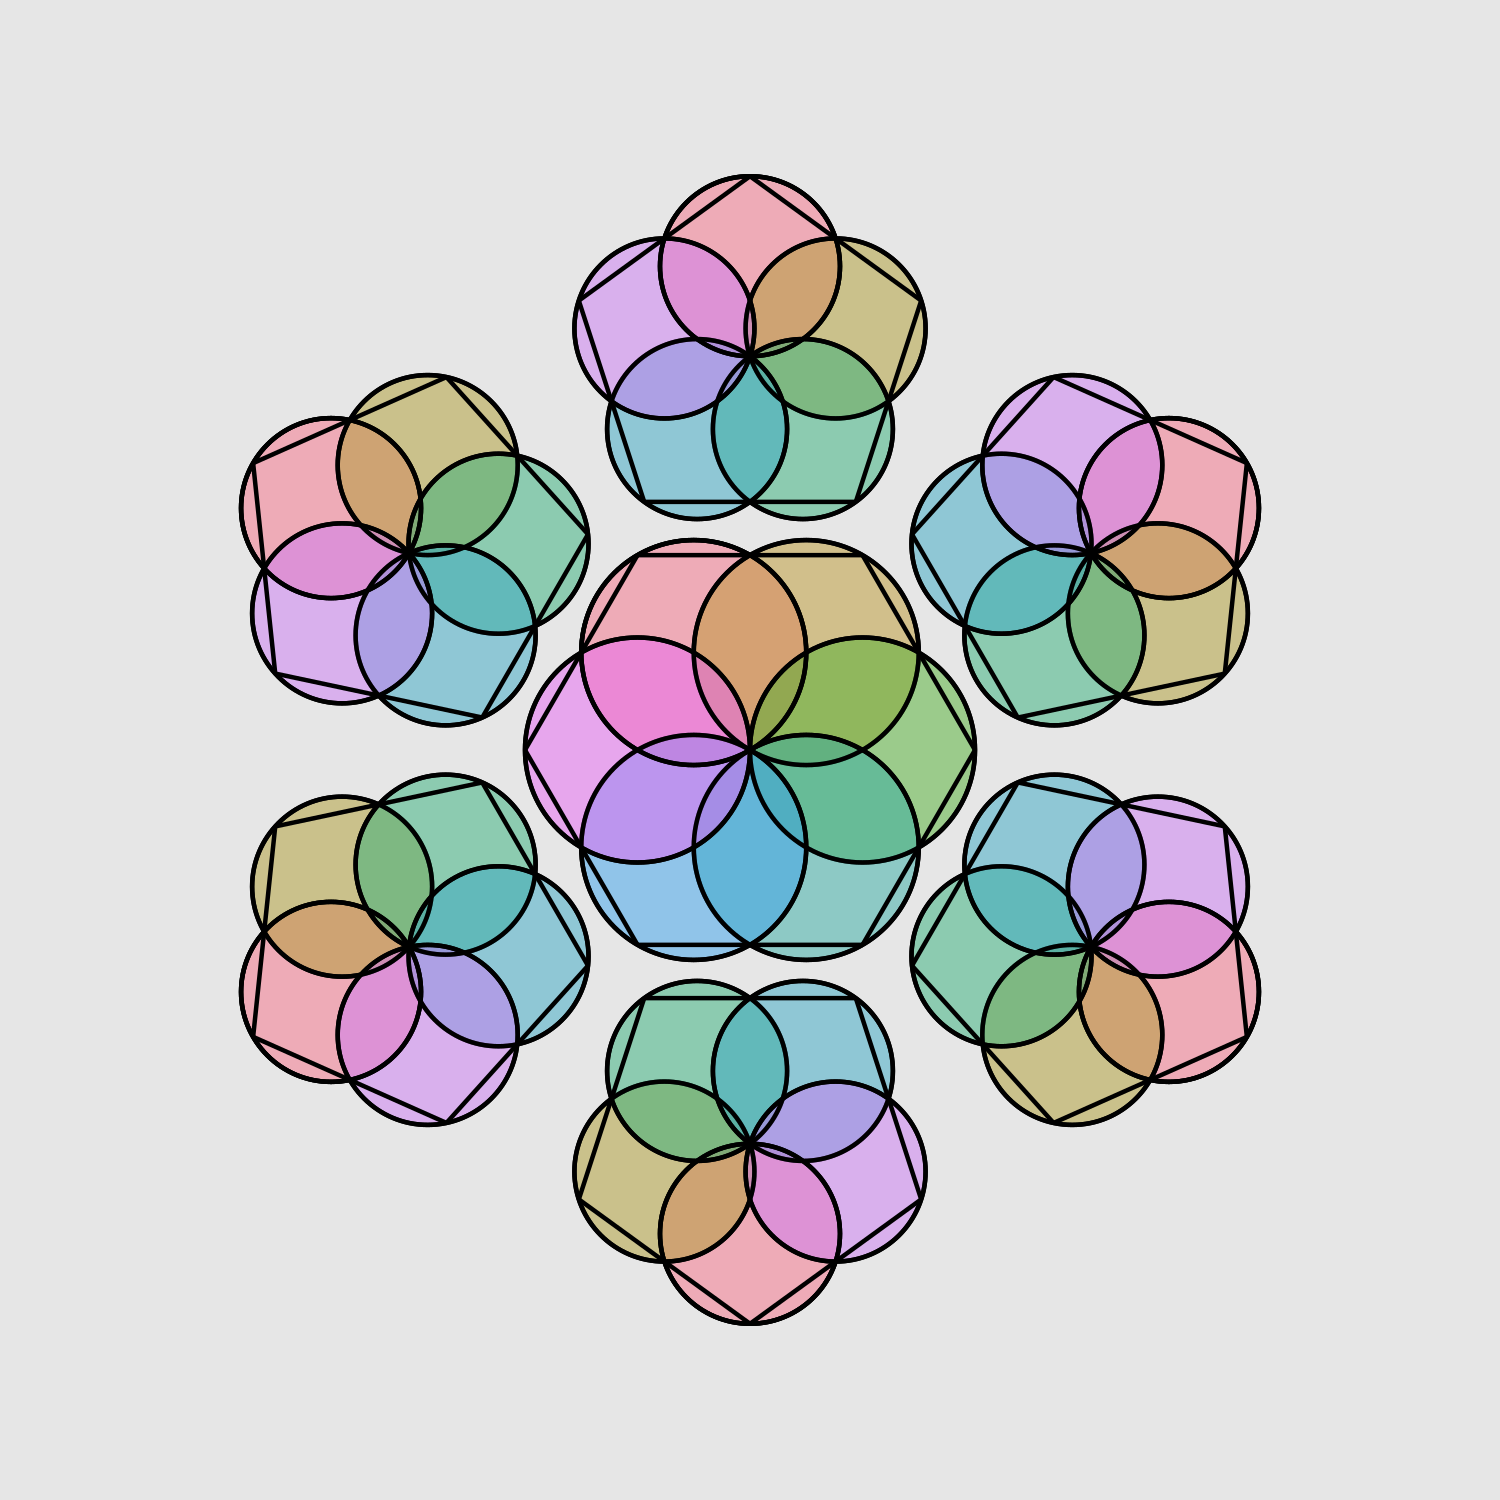

In [8]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides-2))}
#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)
#recursive_shapes(ctx, origin=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, circle=draw_circles)
#cmap = {i: [1,1,1, alpha] for i in range(nsides-2)}
cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides))}
draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )
sets = get_next_sets(ctx, (0.5,0.5), heading, radius, 6)

s1  = sets[0]
s2 = sets[3]

nsides = 5
cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides))}
#cmap = {i:[*c, alpha] for i, c, in enumerate(sns.cubehelix_palette(n_colors=nsides, start=0, rot=-1, hue=1, dark=0.3))}
radius = radius * 0.8
#draw_nested_inscribed_circle(ctx, center=s1[0], heading=s1[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)
#draw_nested_inscribed_circle(ctx, center=s2[0], heading=s2[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)
for s in sets:
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))

In [10]:
sns.color_palette('cubehelix')

[(0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]

In [11]:
sns.color_palette('husl', 30)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9694979754285514, 0.4537284387051496, 0.40783466214891867),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.6234809659087222, 0.6330654918766613, 0.19369052933737949),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.46810256823426116, 0.6699492535792404, 0.19289587399044988),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.19645998900718342, 0.6974309119838096, 0.3614680088321782),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2047934223695329, 0.6857201900461317, 0.5491539606228022),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.2161609050020783, 0.6684079809438751, 0.7255515774097884),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.22480301438618688, 0.6541170341314059, 0.8343335482693295),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.43328034117642245, 0.6065273407962816, 0.9585467098271748),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.6968456641452155, 0.5283777451706791, 0.9581680759272918),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104),
 (0.9660237860697111, 0.42783187979900156, 0.636998264206457)]

In [12]:
[0,1,2,3,4]
[5,6,7,8,9]
[10,11,12,13,14]

[10, 11, 12, 13, 14]

In [13]:
l = np.arange(31)
incr = l[::6]
for i in incr:
    sub = l[i: i+5]
    print(sub)


[0 1 2 3 4]
[ 6  7  8  9 10]
[12 13 14 15 16]
[18 19 20 21 22]
[24 25 26 27 28]
[30]


In [14]:
l = np.arange(30)
incr = l[::5]
for i in incr:
    sub = l[i:i+5]
    print(sub)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]


In [15]:
cmap

{0: [0.9677975592919913, 0.44127456009157356, 0.5358103155058701, 0.5],
 1: [0.6804189127793346, 0.6151497514677574, 0.19405452111445337, 0.5],
 2: [0.20125317221201128, 0.6907920815379025, 0.47966761189275336, 0.5],
 3: [0.2197995660828324, 0.6625157876850336, 0.7732093159317209, 0.5],
 4: [0.8004936186423958, 0.47703363533737203, 0.9579547196007522, 0.5]}

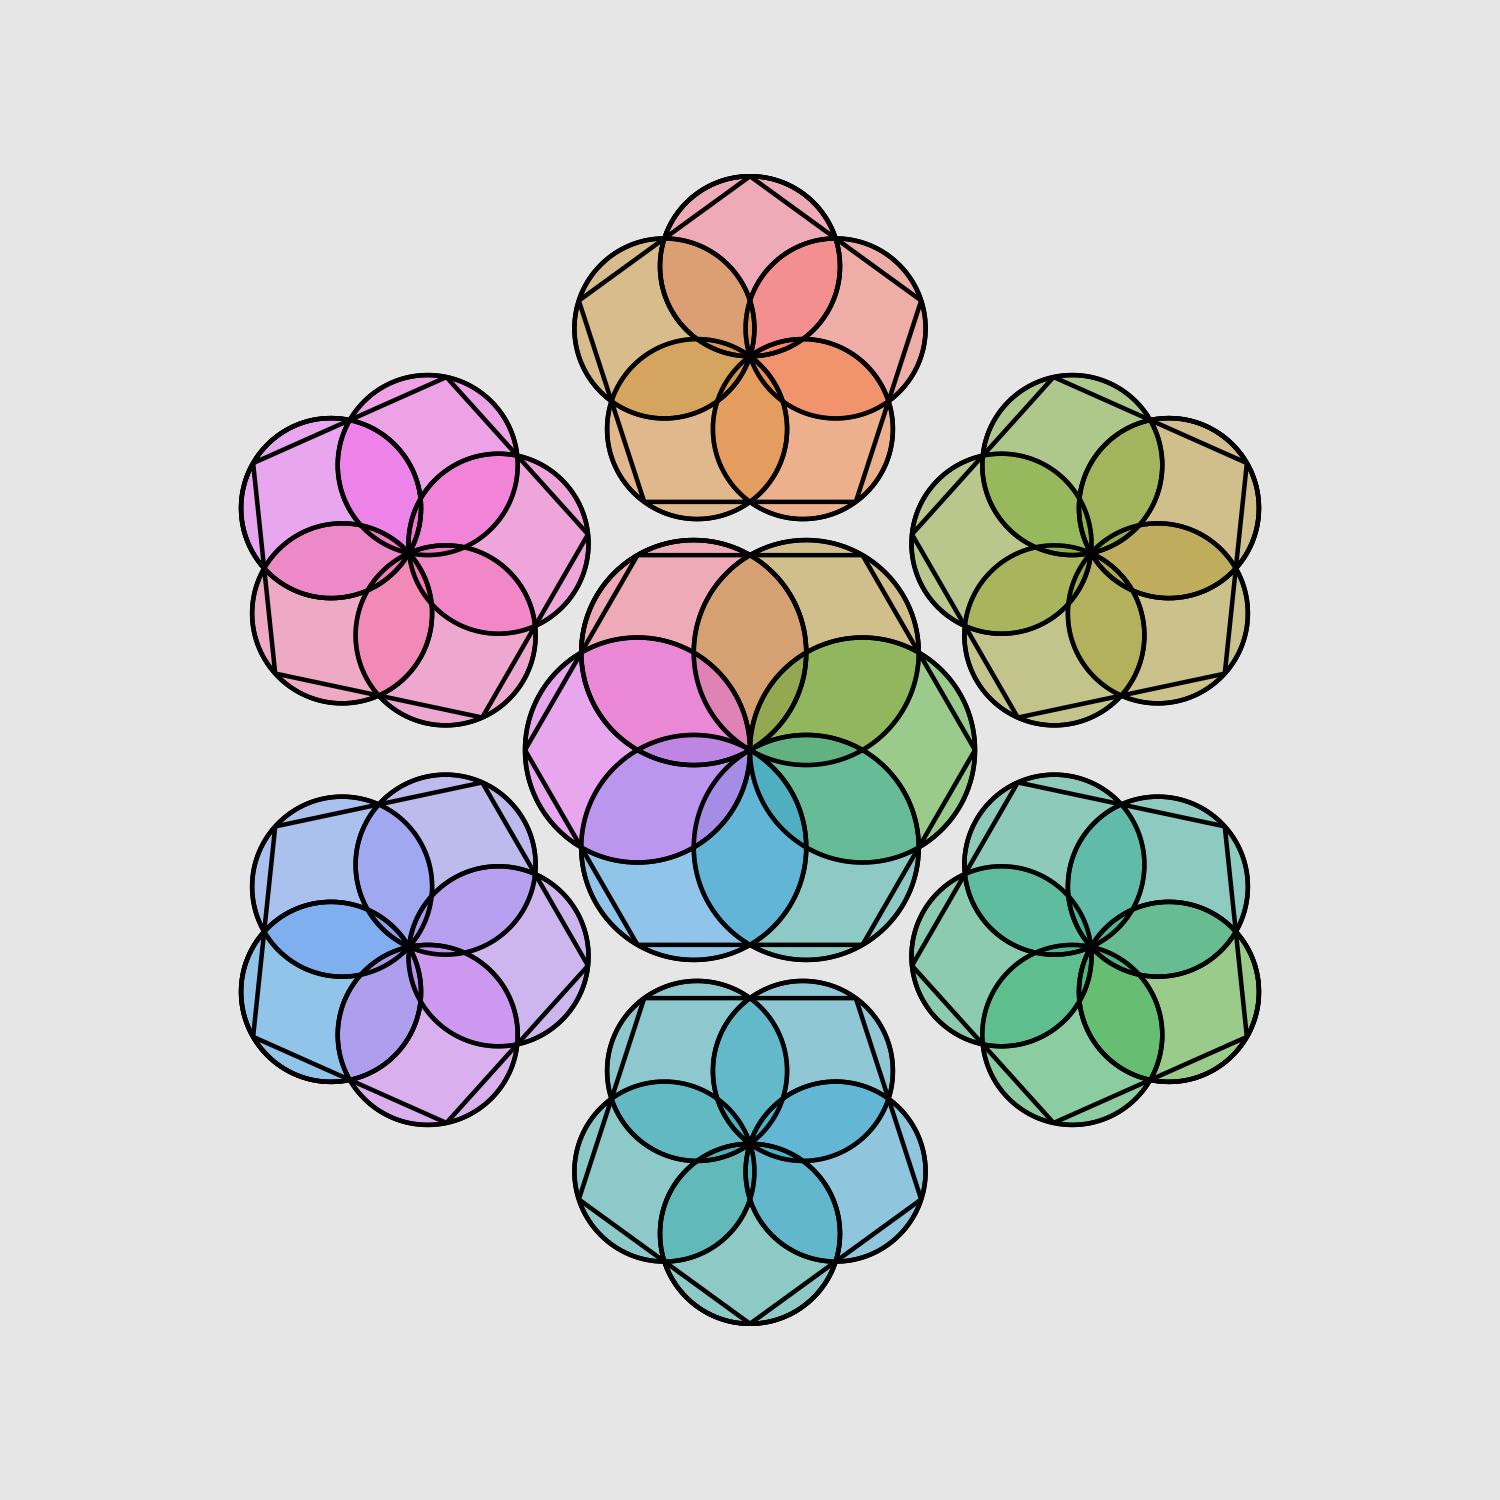

In [16]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )
sets = get_next_sets(ctx, (0.5,0.5), heading, radius, 6)


nsides = 5
radius = radius * 0.8
for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


In [17]:
def to_rads(deg):
    return deg * (math.pi / 180)


theta = 360/5
psi = (180 - theta) / 2

theta = to_rads(theta)
psi = to_rads(psi)

#length of the old
math.sin(theta) * (radius / math.sin(psi))

0.14106846055019354

In [18]:
def next_radius(prev_radius, prev_n_sides, next_n_sides):
    prev_theta = 360/prev_n_sides
    prev_psi = (180 - prev_theta) / 2
    prev_theta, prev_psi = to_rads(prev_theta), to_rads(prev_psi)
    
    edge_len = math.sin(prev_theta) * (prev_radius / math.sin(prev_psi))
    
    next_theta = 360/next_n_sides
    next_psi = (180 - next_theta) / 2
    next_theta, next_psi = to_rads(next_theta), to_rads(next_psi)
    
    return (edge_len / math.sin(next_theta)) * math.sin(next_psi)

In [19]:
next_radius(1, 6, 5)

0.85065080835204

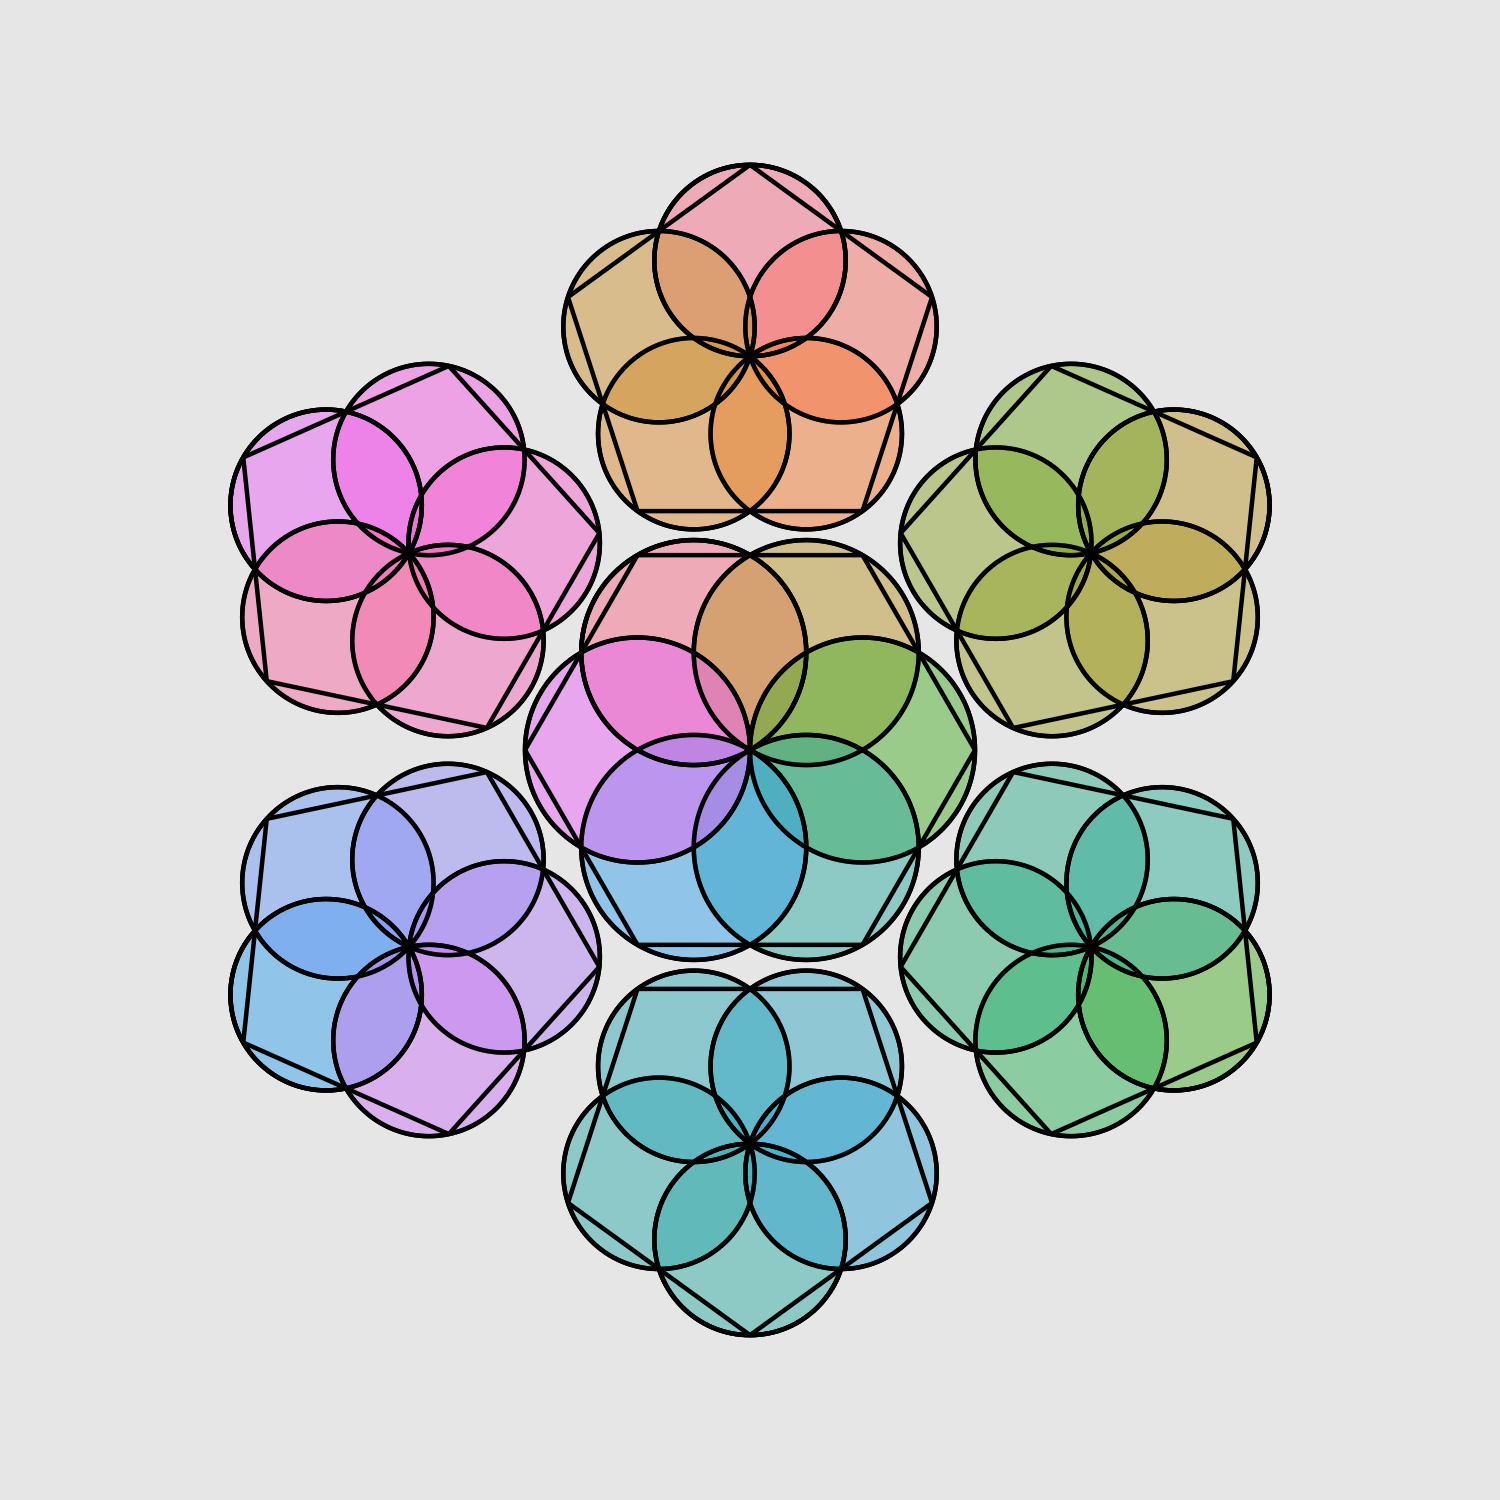

In [20]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )
sets = get_next_sets(ctx, (0.5,0.5), heading, radius, 6)


nsides = 5
radius = next_radius(radius, 6, nsides)
for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


In [57]:
# Return sets of (center, heading). Indicates where the next circles should be drawn
def small_dist(nsides, radius):
    theta = to_rads(360 / nsides / 2)
    return radius - radius * math.cos(theta)

def get_next_sets(cr, center, heading, radius, nsides, next_radius, next_nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    if nsides % 2 != 0:
        init_hd = init_hd - math.radians(360/nsides/2)
    for i in range(nsides):
        cr.move_to(*center)
        delta = small_dist(nsides, radius) + small_dist(next_nsides, next_radius)
        x = center[0] + np.cos(init_hd + i * incr) *  (radius + next_radius - delta)
        y = center[1] + np.sin(init_hd + i * incr)*  (radius + next_radius - delta)
        sets.append([(x,y), init_hd + i * incr])
    
    return sets    

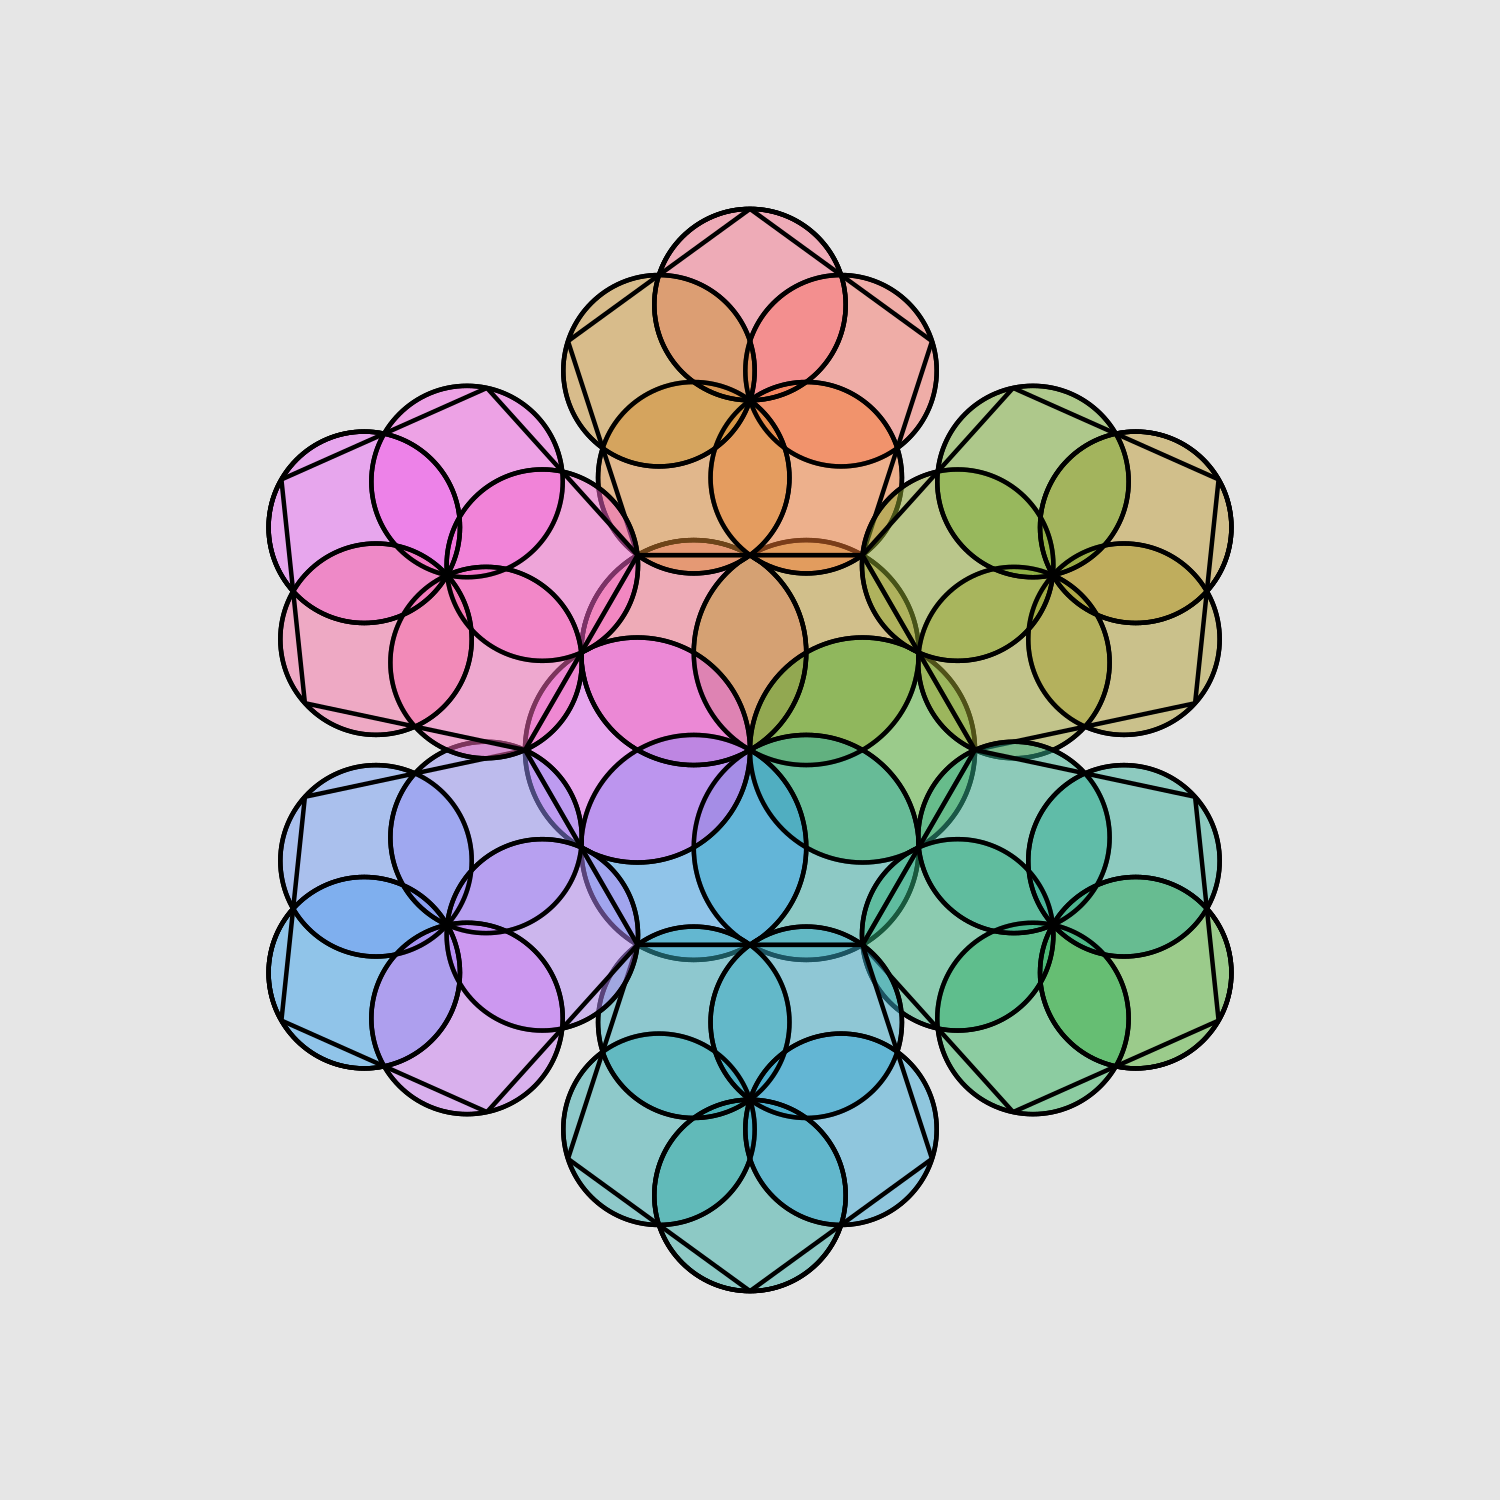

In [58]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

prev_radius = radius
prev_nsides = nsides
nsides = 5
radius = next_radius(prev_radius, prev_nsides, nsides)

sets = get_next_sets(ctx, (0.5,0.5), heading, prev_radius, prev_nsides, radius, nsides)



for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


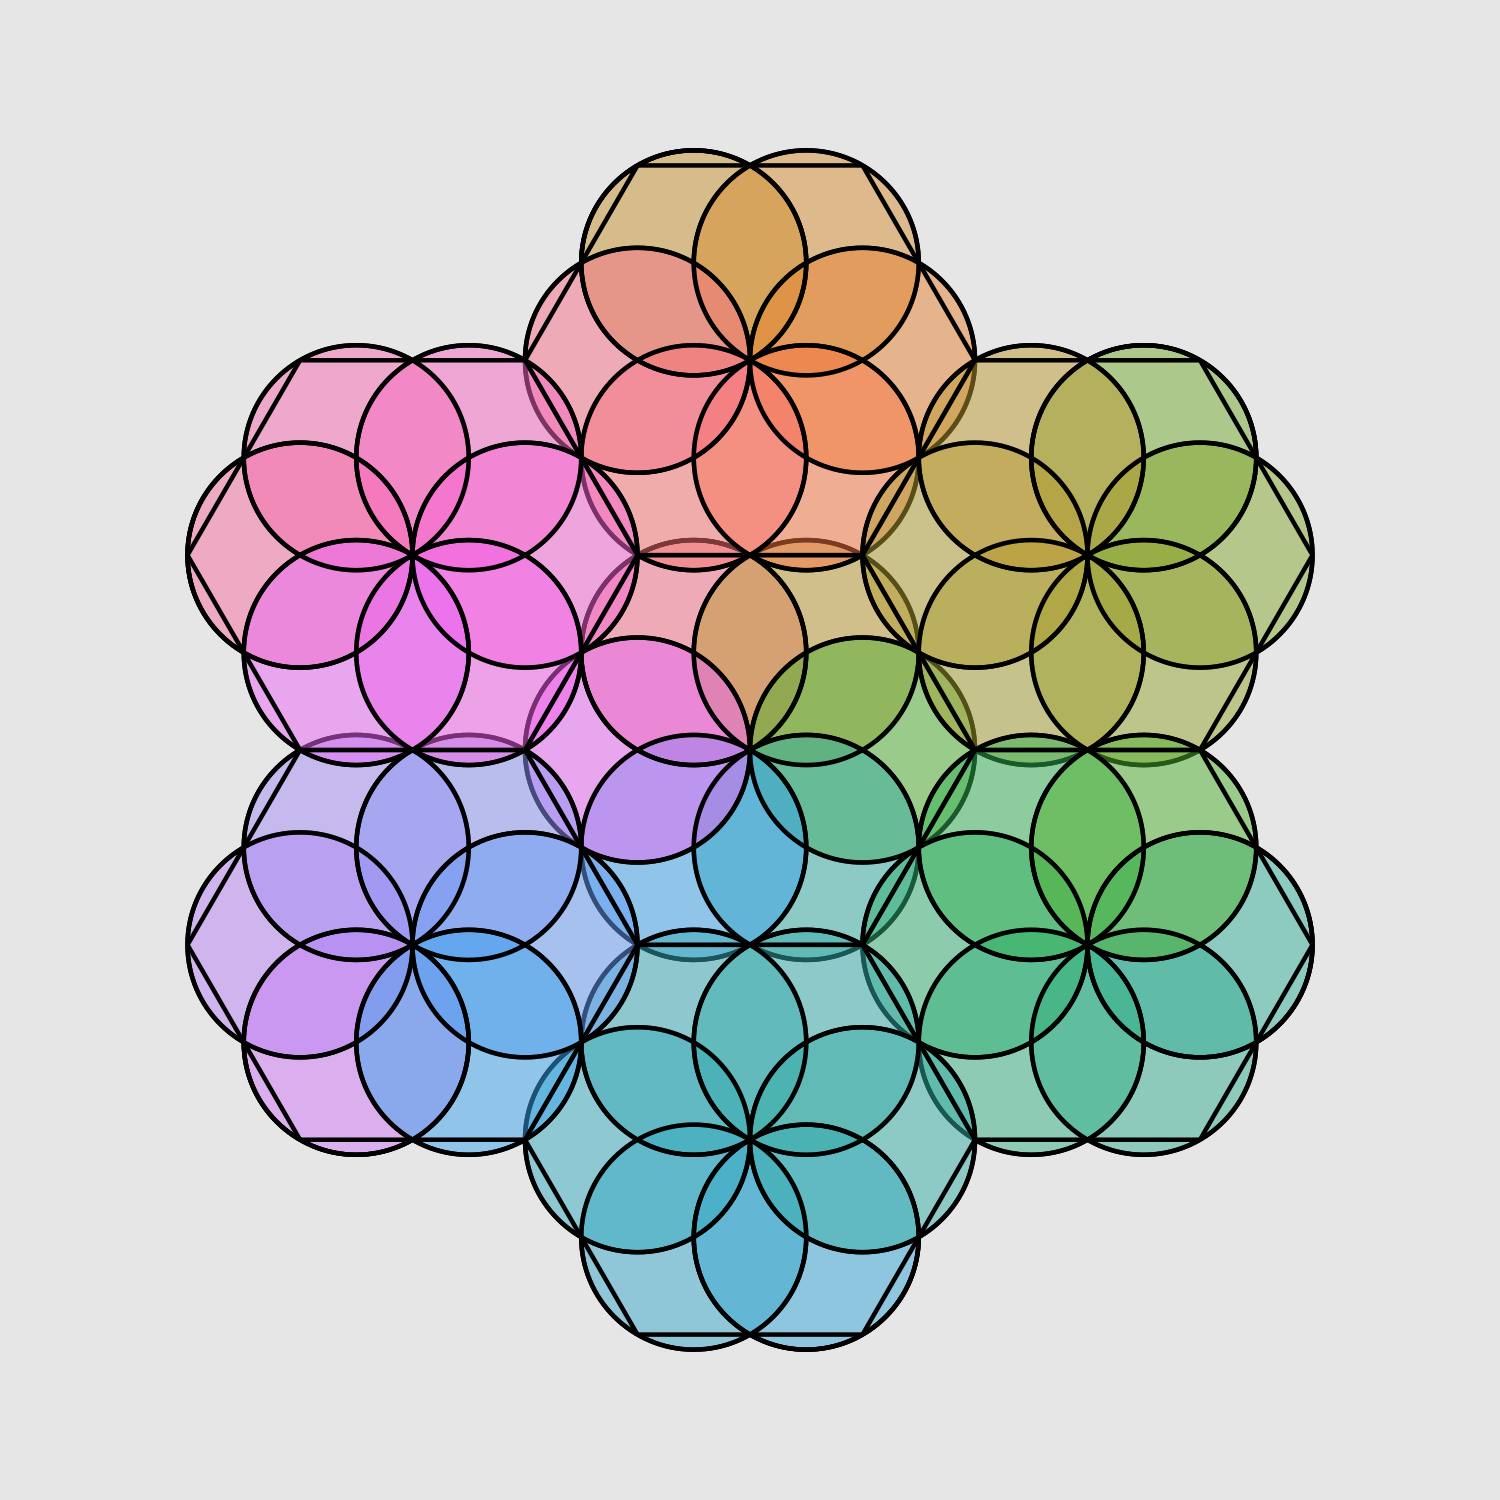

In [59]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 36)
incr = np.arange(36)[::6]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

prev_radius = radius
prev_nsides = nsides
nsides = 6
radius = next_radius(prev_radius, prev_nsides, nsides)

sets = get_next_sets(ctx, (0.5,0.5), heading, prev_radius, prev_nsides, radius, nsides)



for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+6][::-1]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


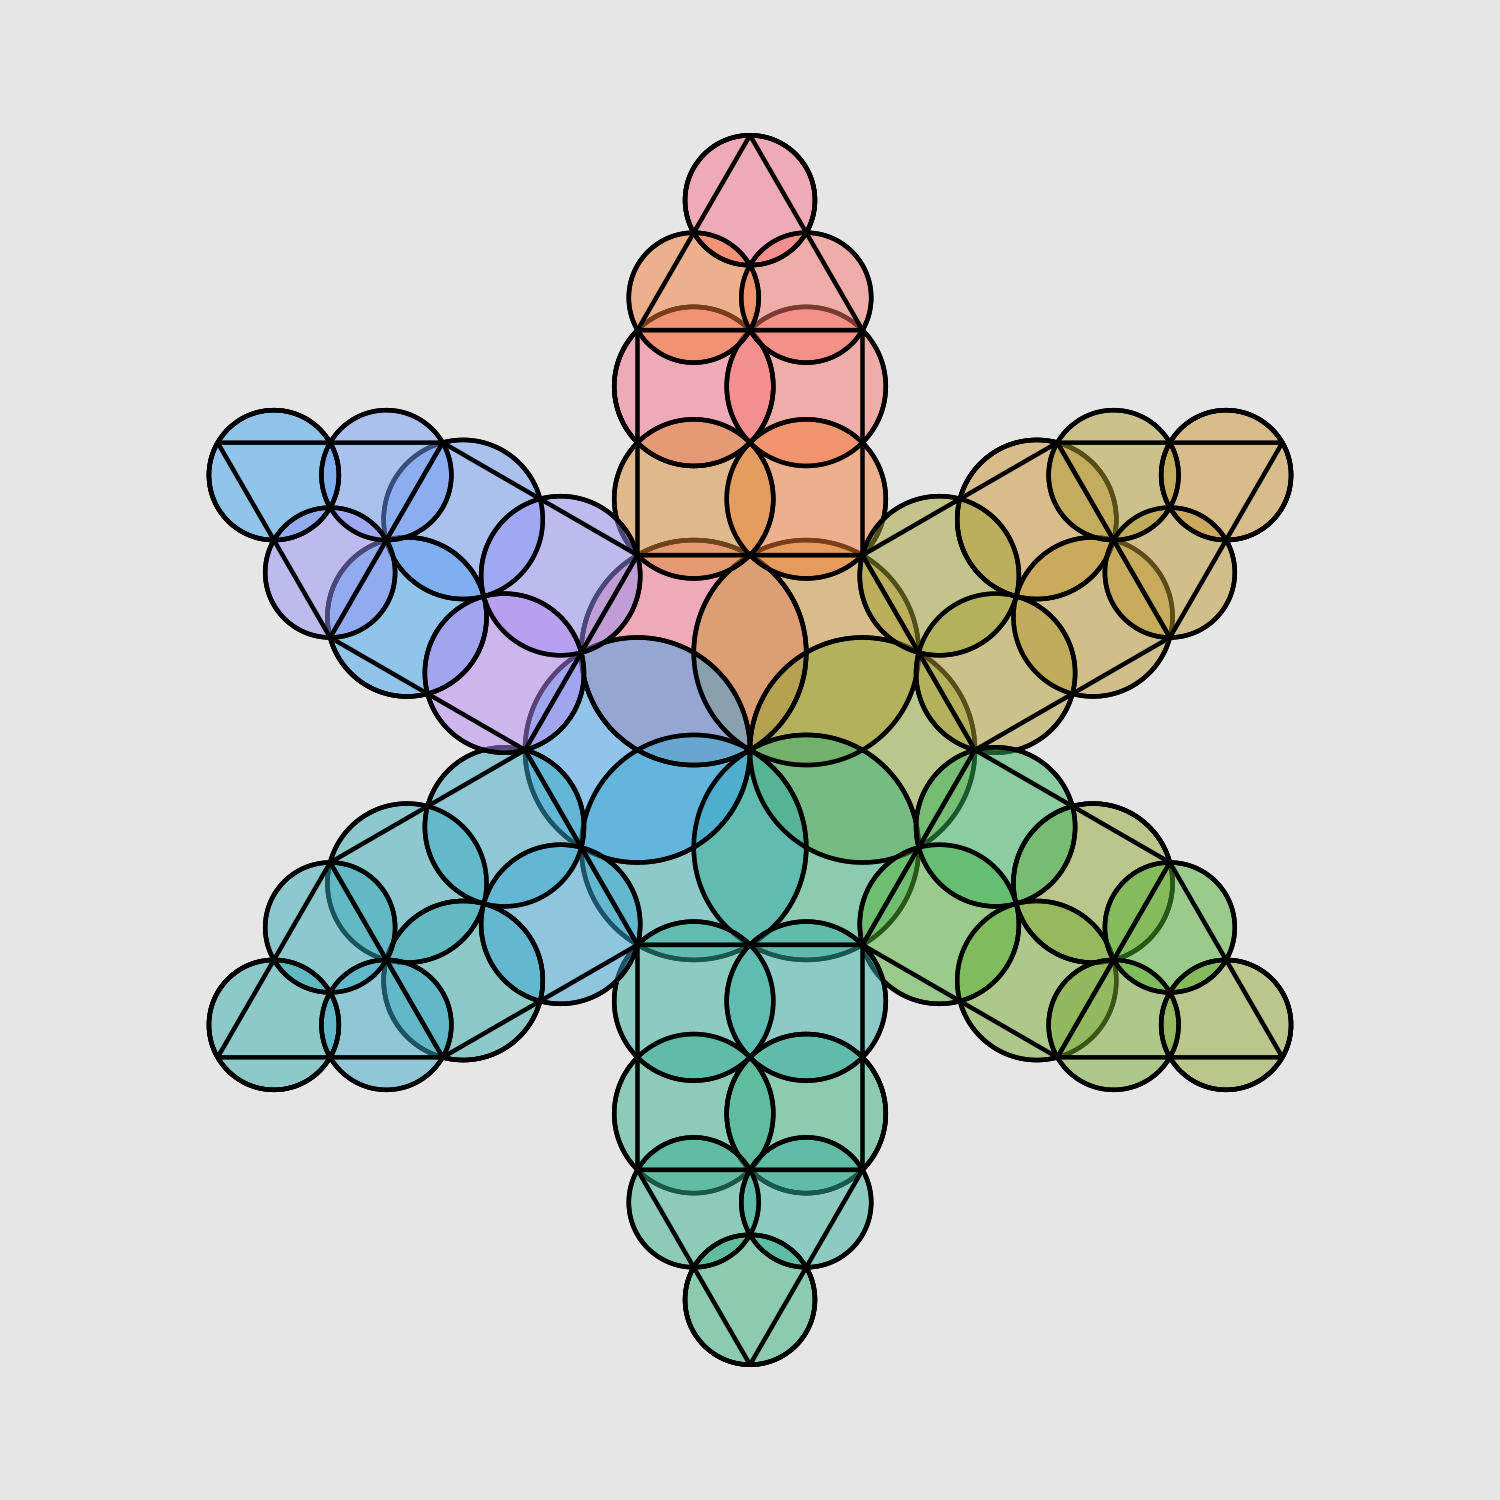

In [60]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(24)[::4]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

prev_radius = radius
prev_nsides = nsides
nsides = 4
radius = next_radius(prev_radius, prev_nsides, nsides)

sets = get_next_sets(ctx, (0.5,0.5), heading, prev_radius, prev_nsides, radius, nsides)



for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+4]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)
    
    next_r = next_radius(radius, nsides, nsides-1)
    next_sets = get_next_sets(ctx, s[0], s[1], radius, nsides, next_r, nsides-1)
    #for tup in next_sets:
    #    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)
    tup = next_sets[0]
    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)
io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


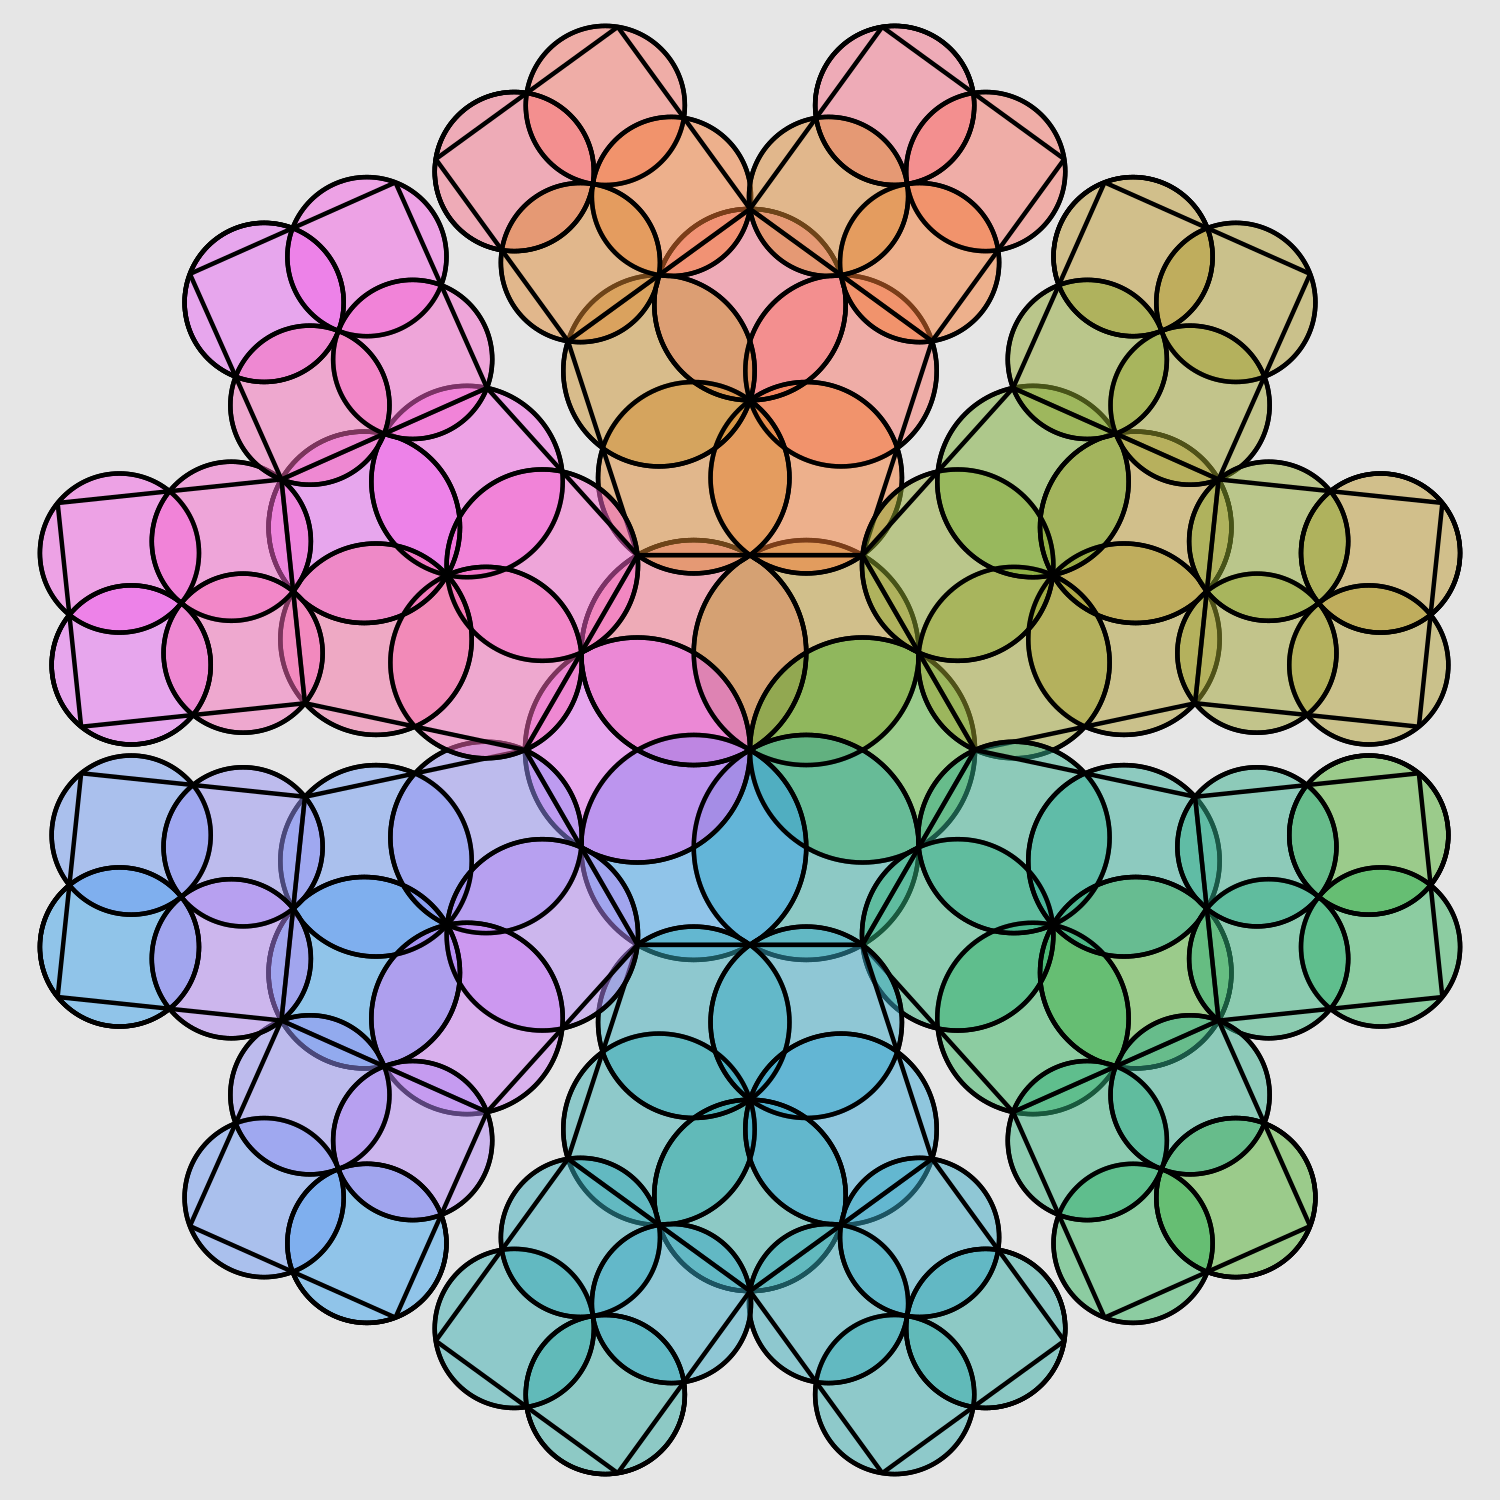

In [62]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

prev_radius = radius
prev_nsides = nsides
nsides = 5
radius = next_radius(prev_radius, prev_nsides, nsides)

sets = get_next_sets(ctx, (0.5,0.5), heading, prev_radius, prev_nsides, radius, nsides)



for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)
    
    next_r = next_radius(radius, nsides, nsides-1)
    next_sets = get_next_sets(ctx, s[0], s[1], radius, nsides, next_r, nsides-1)
    #for tup in next_sets:
    #    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)
    for tup in [next_sets[0], next_sets[1]]:
        draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)
io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


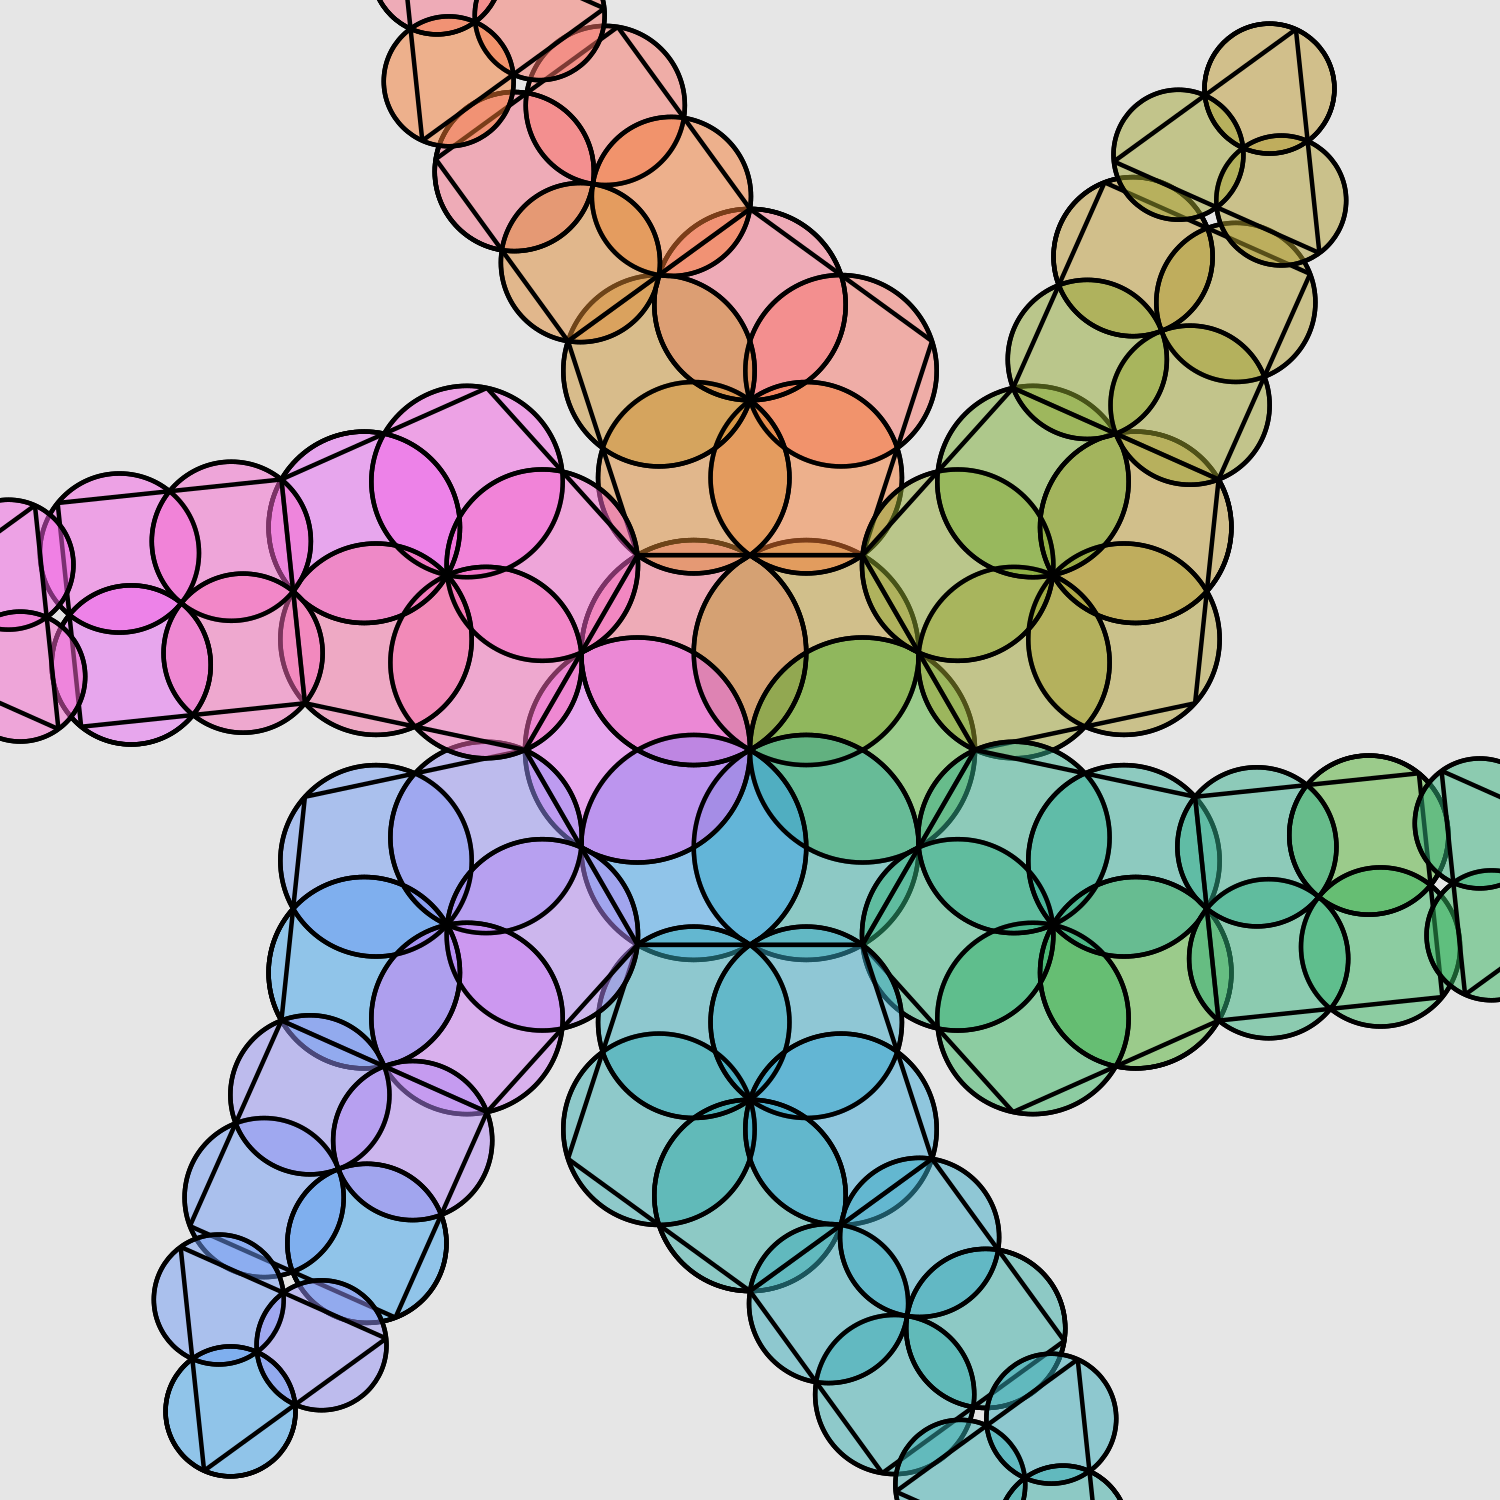

In [71]:
WIDTH = 1500
HEIGHT = 1500
nsides = 6 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )

prev_radius = radius
prev_nsides = nsides
nsides = 5
radius = next_radius(prev_radius, prev_nsides, nsides)

sets = get_next_sets(ctx, (0.5,0.5), heading, prev_radius, prev_nsides, radius, nsides)



for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)
    prev_nsides = nsides
    next_nsides = prev_nsides - 1
    next_r = next_radius(radius, prev_nsides, next_nsides)
    next_sets = get_next_sets(ctx, s[0], s[1], radius, prev_nsides, next_r, next_nsides)
    #for tup in next_sets:
    #    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)
    tup = next_sets[0]
    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=nsides-1, line_color=[0,0,0,1], circle=False,)

    prev_nsides = next_nsides
    next_nsides = prev_nsides - 1
    
    next_r = next_radius(next_r, prev_nsides, next_nsides)
    next_sets = get_next_sets(ctx, tup[0], tup[1], radius, prev_nsides, next_r, next_nsides)
    tup = next_sets[0]
    draw_nested_inscribed_circle(ctx, center=tup[0], heading=tup[1], radius=next_r, nsides=next_nsides, line_color=[0,0,0,1], circle=False,)
                                      
                              
io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


In [ ]:
def get_next_sets(cr, center, heading, radius, nsides, next_radius, next_nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    if nsides % 2 != 0:
        init_hd = init_hd - math.radians(360/nsides/2)
    for i in range(nsides):
        cr.move_to(*center)
        delta = small_dist(nsides, radius) + small_dist(next_nsides, next_radius)
        x = center[0] + np.cos(init_hd + i * incr) *  (radius + next_radius - delta)
        y = center[1] + np.sin(init_hd + i * incr)*  (radius + next_radius - delta)
        sets.append([(x,y), init_hd + i * incr])
    
    return sets    

In [55]:
def get_next_sets(cr, center, heading, radius, nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    if nsides % 2 != 0:
        init_hd = init_hd - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    for i in range(nsides):
        cr.move_to(*center)
        x = center[0] + np.cos(init_hd + i * incr) * 1.75*radius
        y = center[1] + np.sin(init_hd + i * incr)*1.75*radius
        sets.append([(x,y), init_hd + i * incr])
    
    return sets   

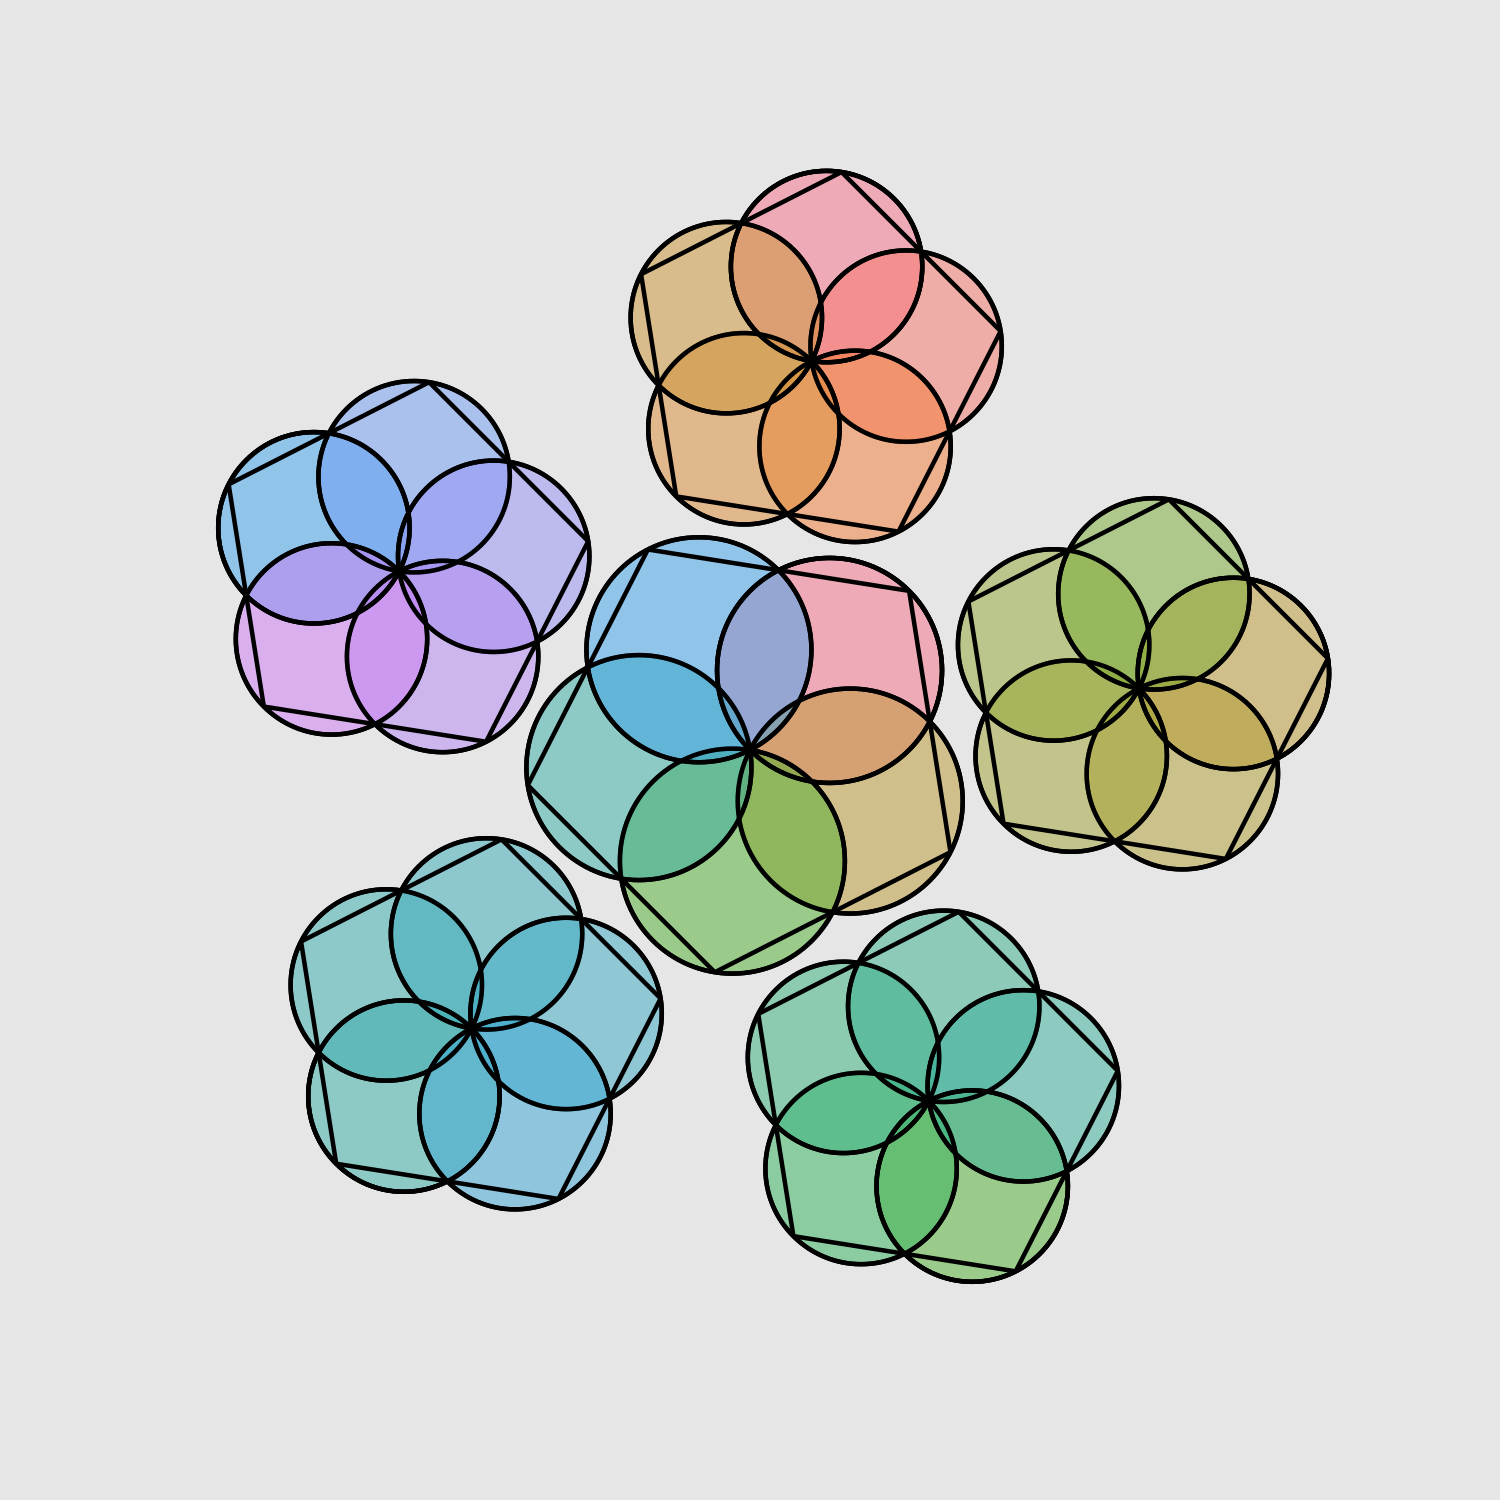

In [56]:
WIDTH = 1500
HEIGHT = 1500
nsides = 5 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/4 #The direction in radians that the Apex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = True # whether to inscribe shapes in circles
###


#radius = 1 / (((nsides-3)*2 + 1) * 2)
radius = 0.15
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0.9,0.9,0.9)
ctx.fill()

ctx.set_line_width(radius/50)

colors = sns.color_palette(palette, 30)
incr = np.arange(30)[::5]
cmap = {i: [*colors[j], alpha] for i, j in enumerate(incr)}

draw_nested_inscribed_circle(ctx, center=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False, )
sets = get_next_sets(ctx, (0.5,0.5), heading, radius, nsides)


nsides = 5
radius = next_radius(radius, 6, nsides)
for i, s in enumerate(sets):
    ind = incr[i]
    crange = colors[ind: ind+5]
    cmap = {j: [*c,alpha] for j, c in enumerate(crange)}
    draw_nested_inscribed_circle(ctx, center=s[0], heading=s[1], radius=radius, nsides=nsides, line_color=[0,0,0,1], circle=False,)


io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))


In [51]:
def draw_nested_inscribed_circle(cr, center, heading, radius, nsides, line_color, circle):
    cx, cy = center
    cr.move_to(*center)
    cr.stroke()
    white = line_color
    
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
    #circle fills
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2
        if i != nsides:
            c = cmap[i]
            
            cr.set_source_rgba(*c)
            cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
            cr.fill_preserve()
            cr.set_source_rgba(*white)
            cr.stroke()
        last_x, last_y = this_x, this_y
    #circle outlines
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius/2
        this_y = cy + np.sin(heading + incr*i) * radius/2            
        cr.arc(*[this_x, this_y], radius/2, 0, 2*pi)
        cr.set_source_rgba(*white)
        cr.stroke()


        last_x, last_y = this_x, this_y
    
    c = cmap[0]
    
    #cr.set_source_rgba(*white)
    
    cr.move_to(*center)
    cr.stroke()
    if circle:
        cr.set_source_rgba(*white)
        cr.arc(*center, radius, 0, 2*pi)
        cr.stroke()
    

    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.set_source_rgba(*white)
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()

        last_x, last_y = this_x, this_y
